In [1]:
import pickle
import matplotlib
import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns; sns.set_context('notebook')
from datetime import datetime
import numpy as np
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
%matplotlib inline

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
batterySet = pickle.load(open("./Battery_Data/new_battery_cycles/new_battery_v2.p", 'rb'))

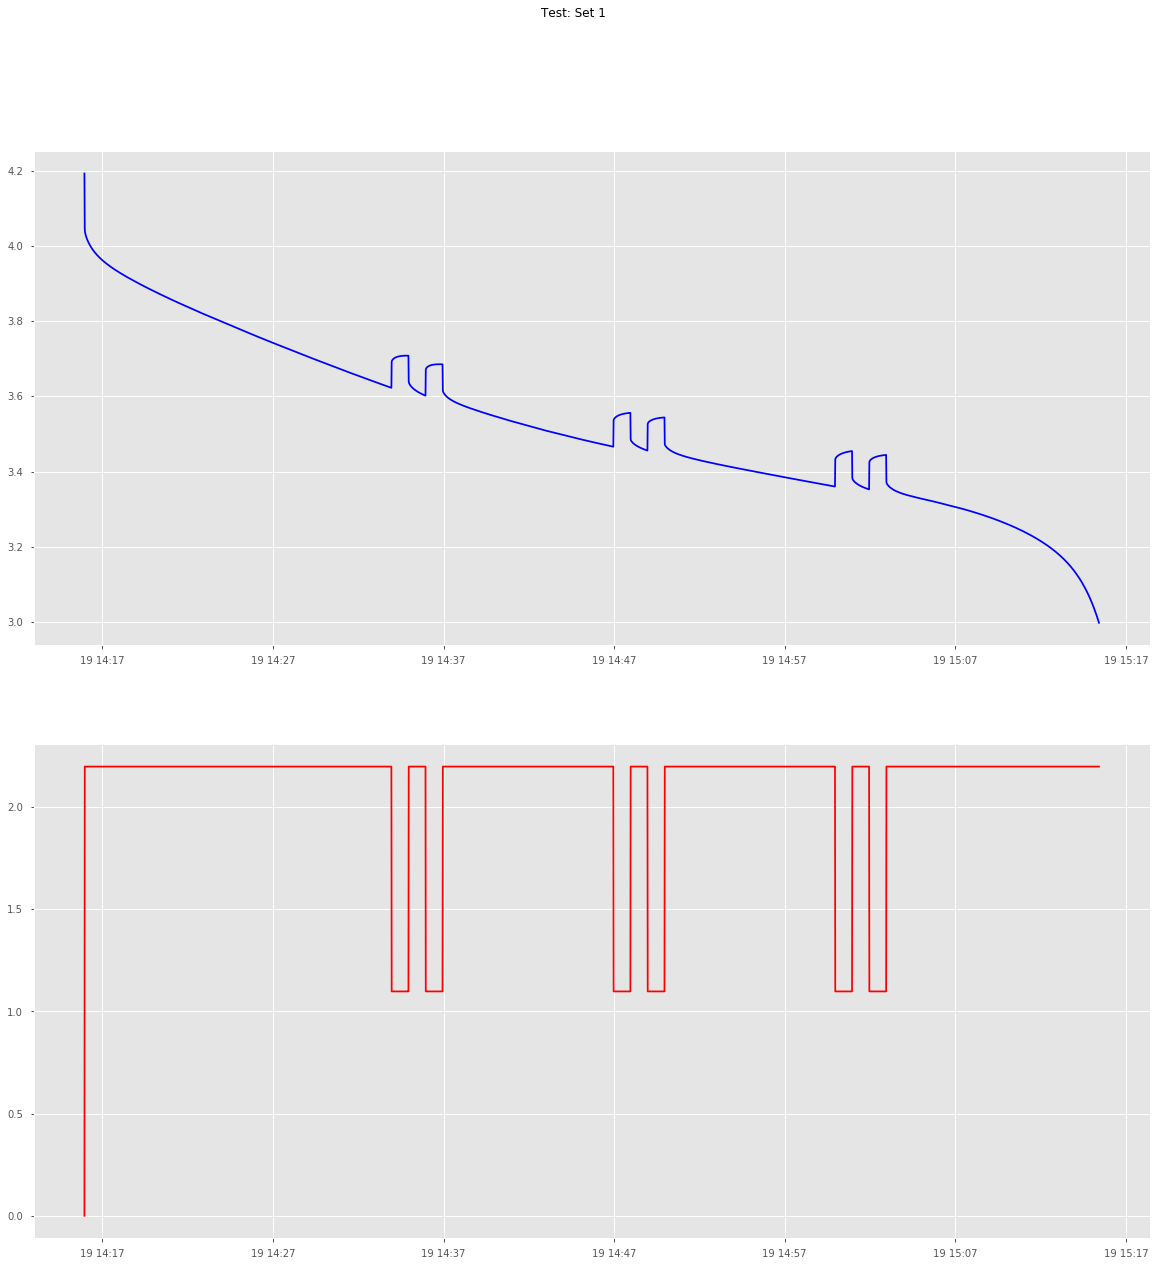

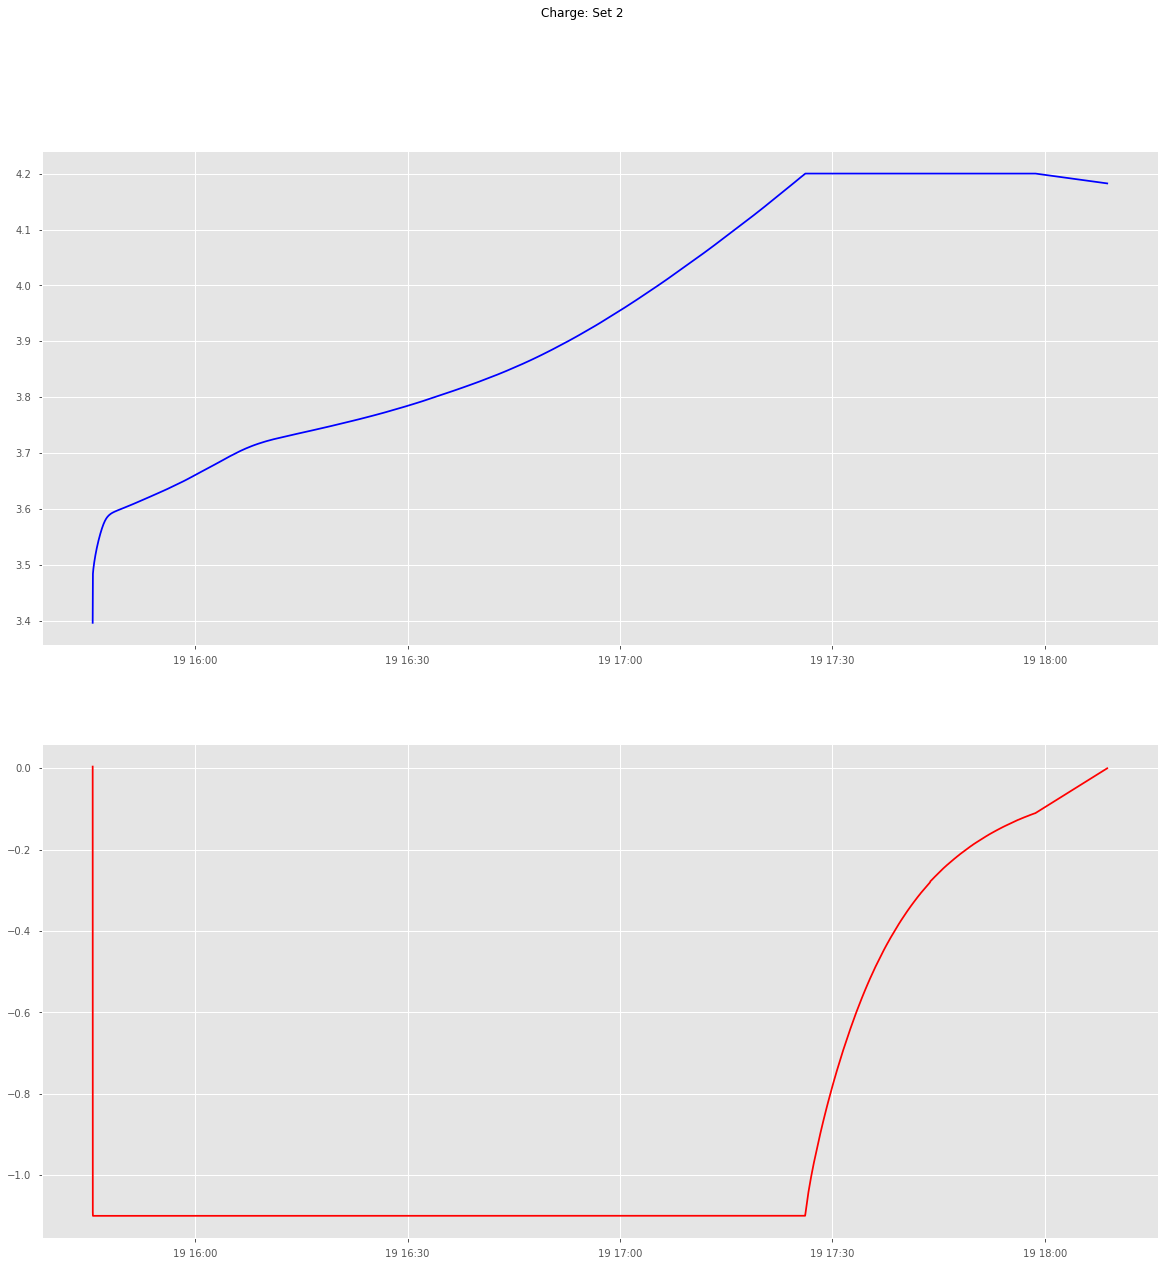

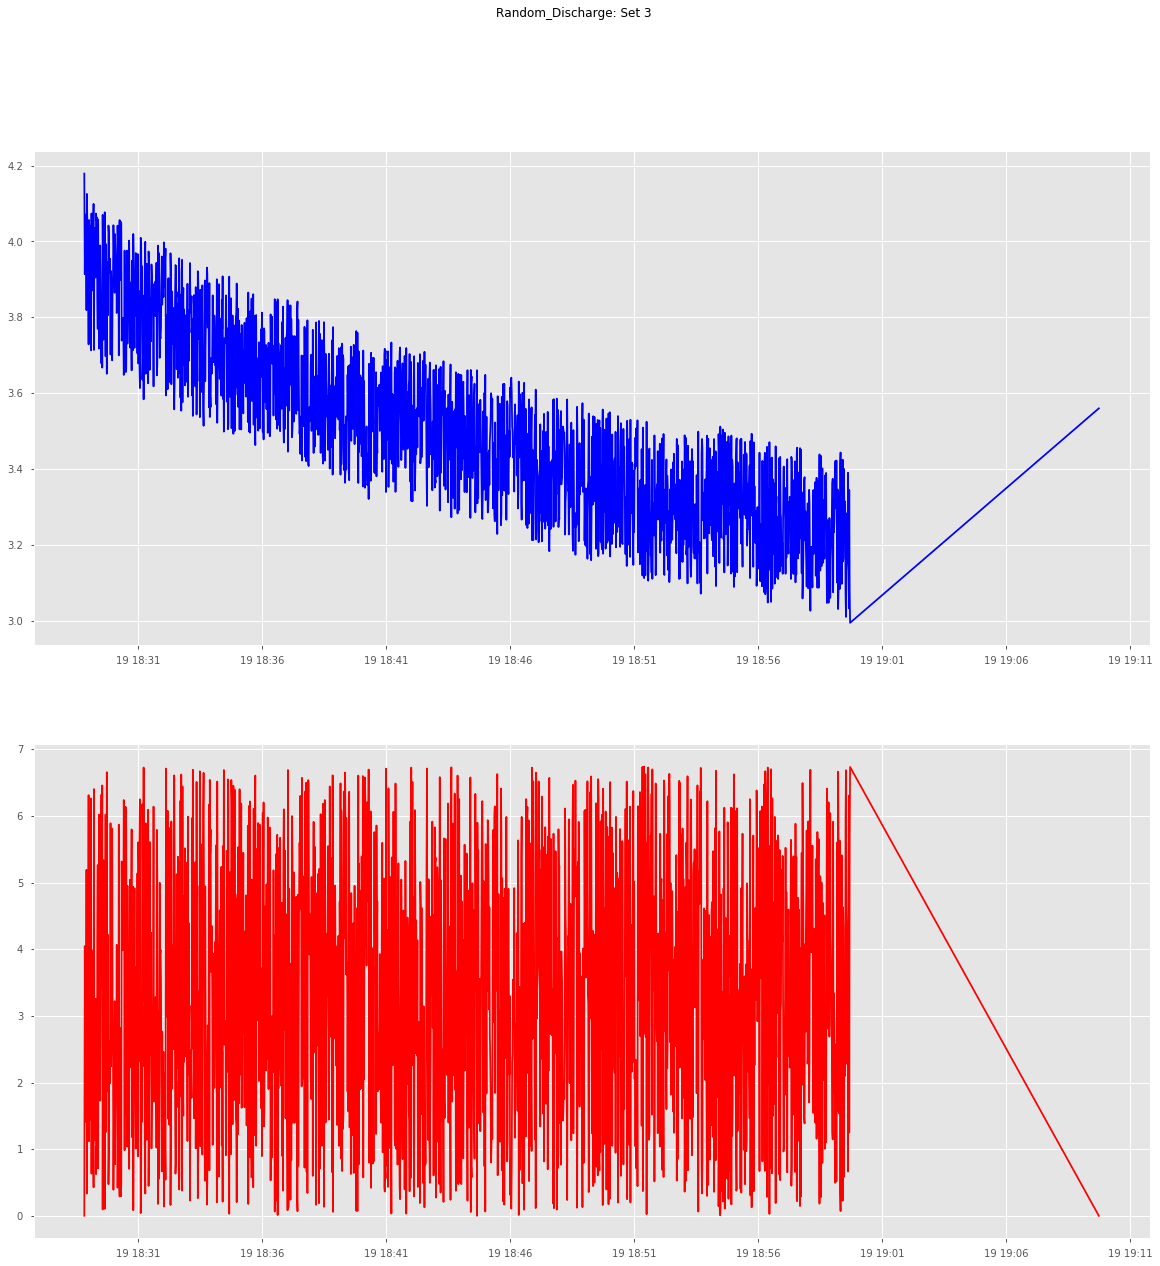

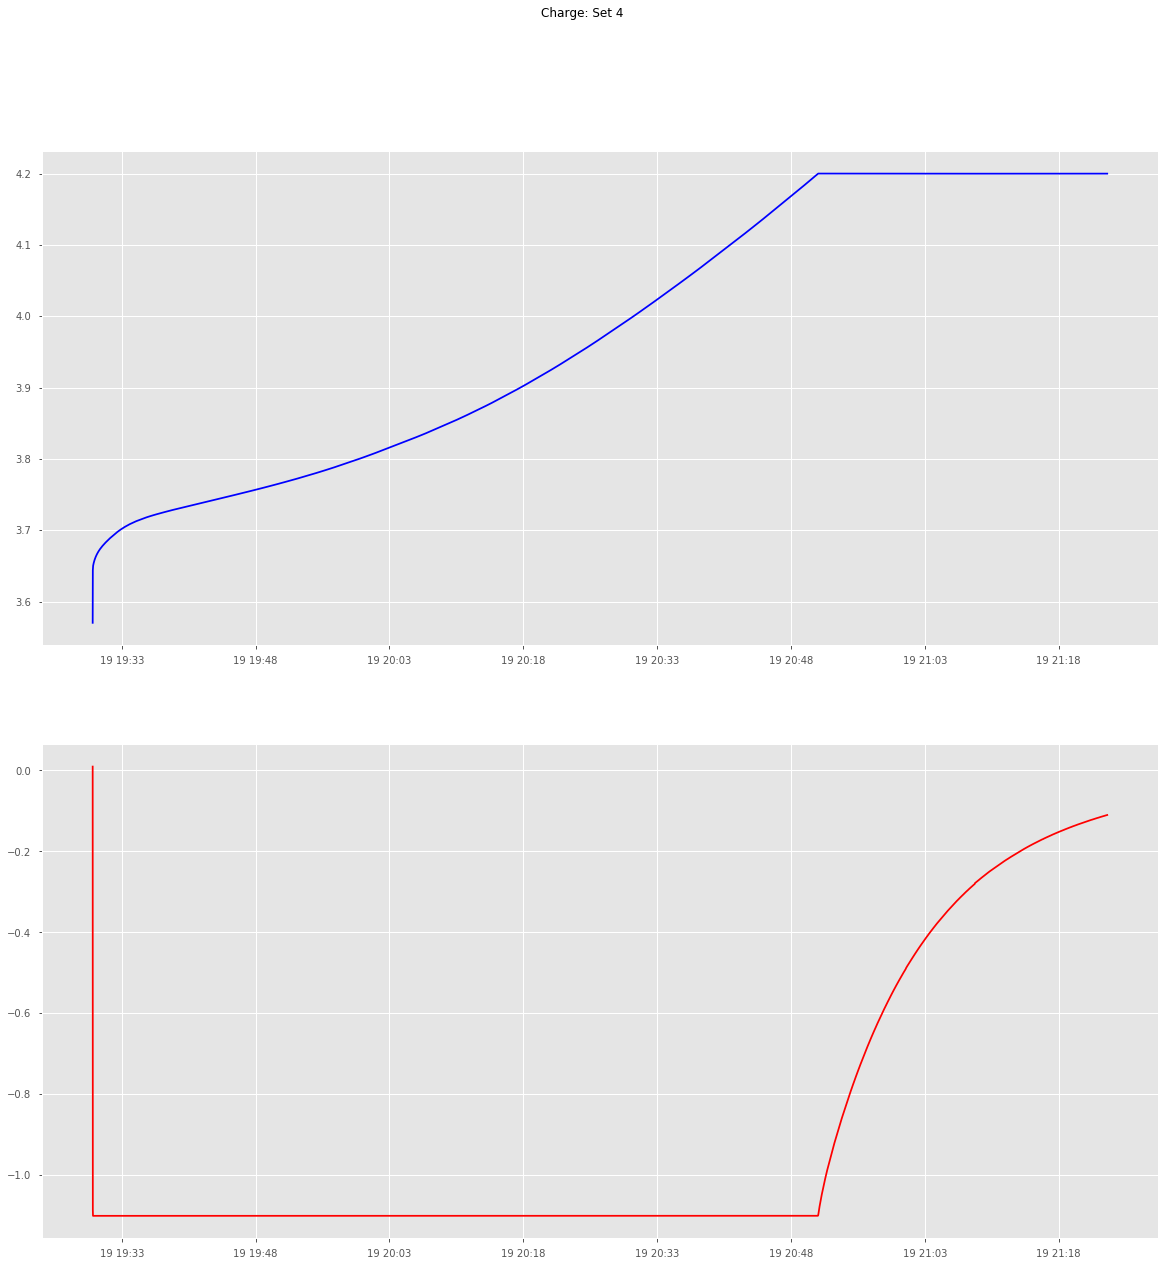

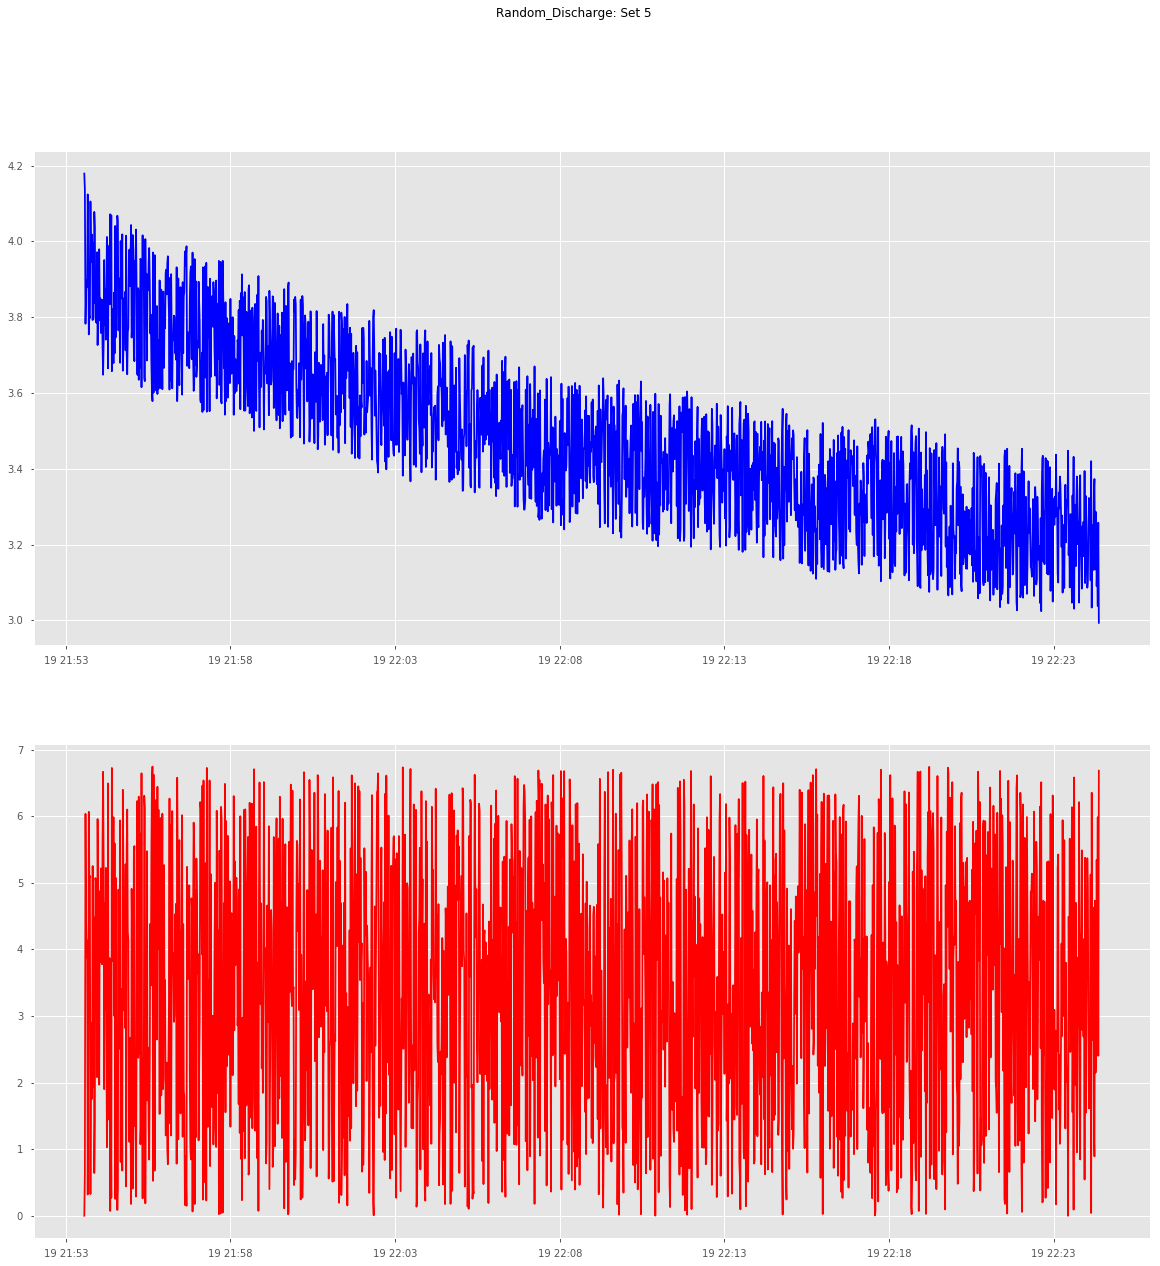

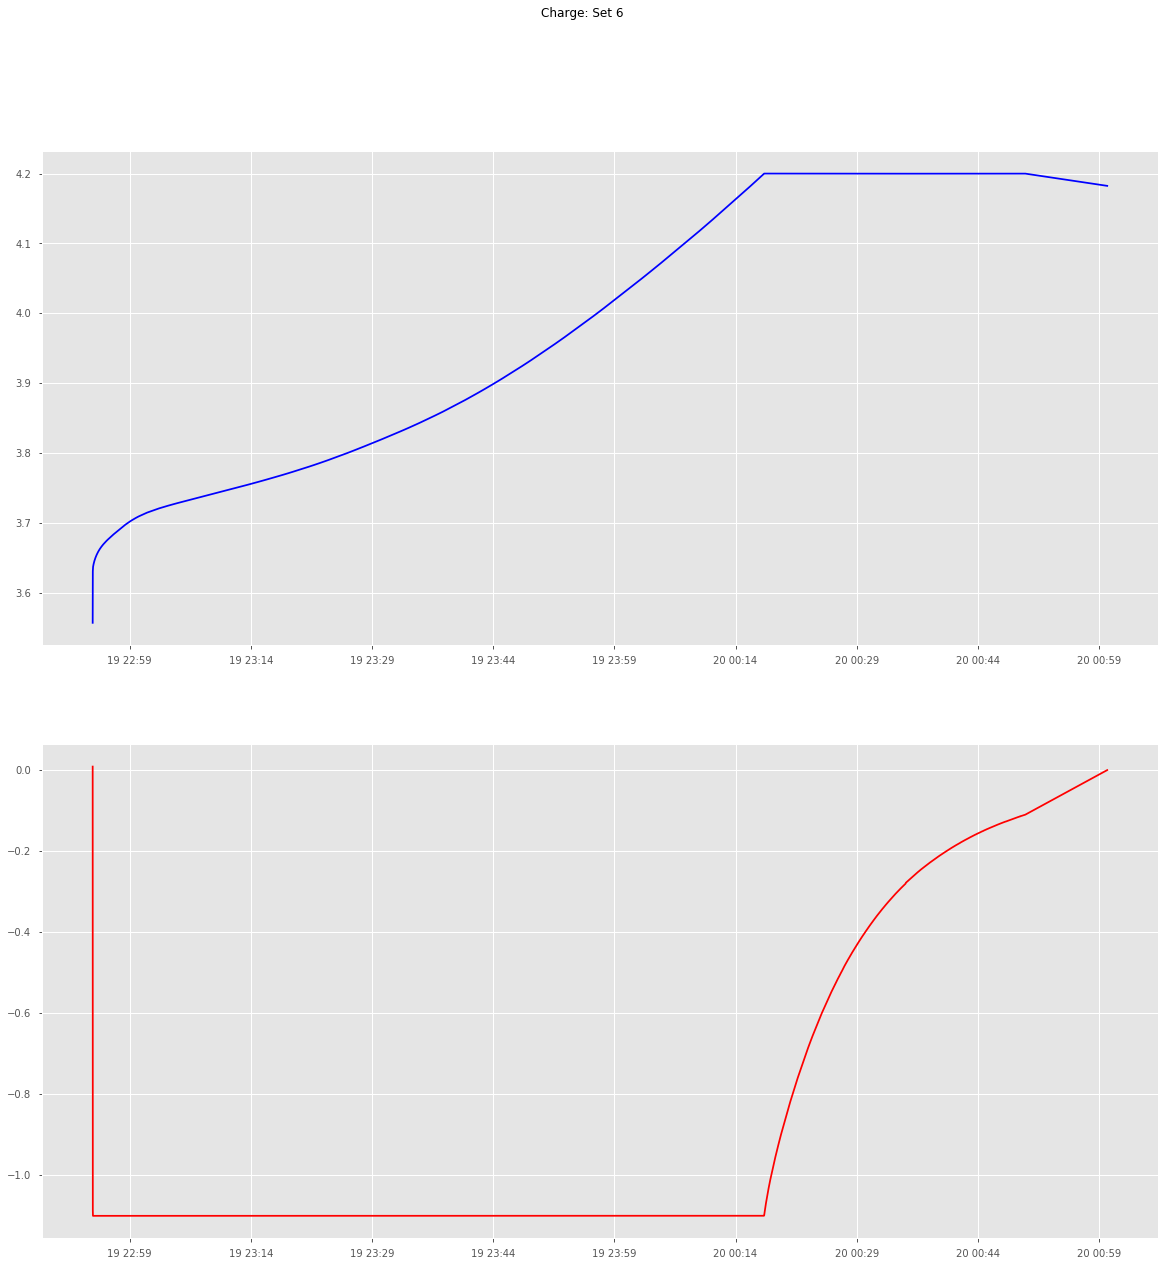

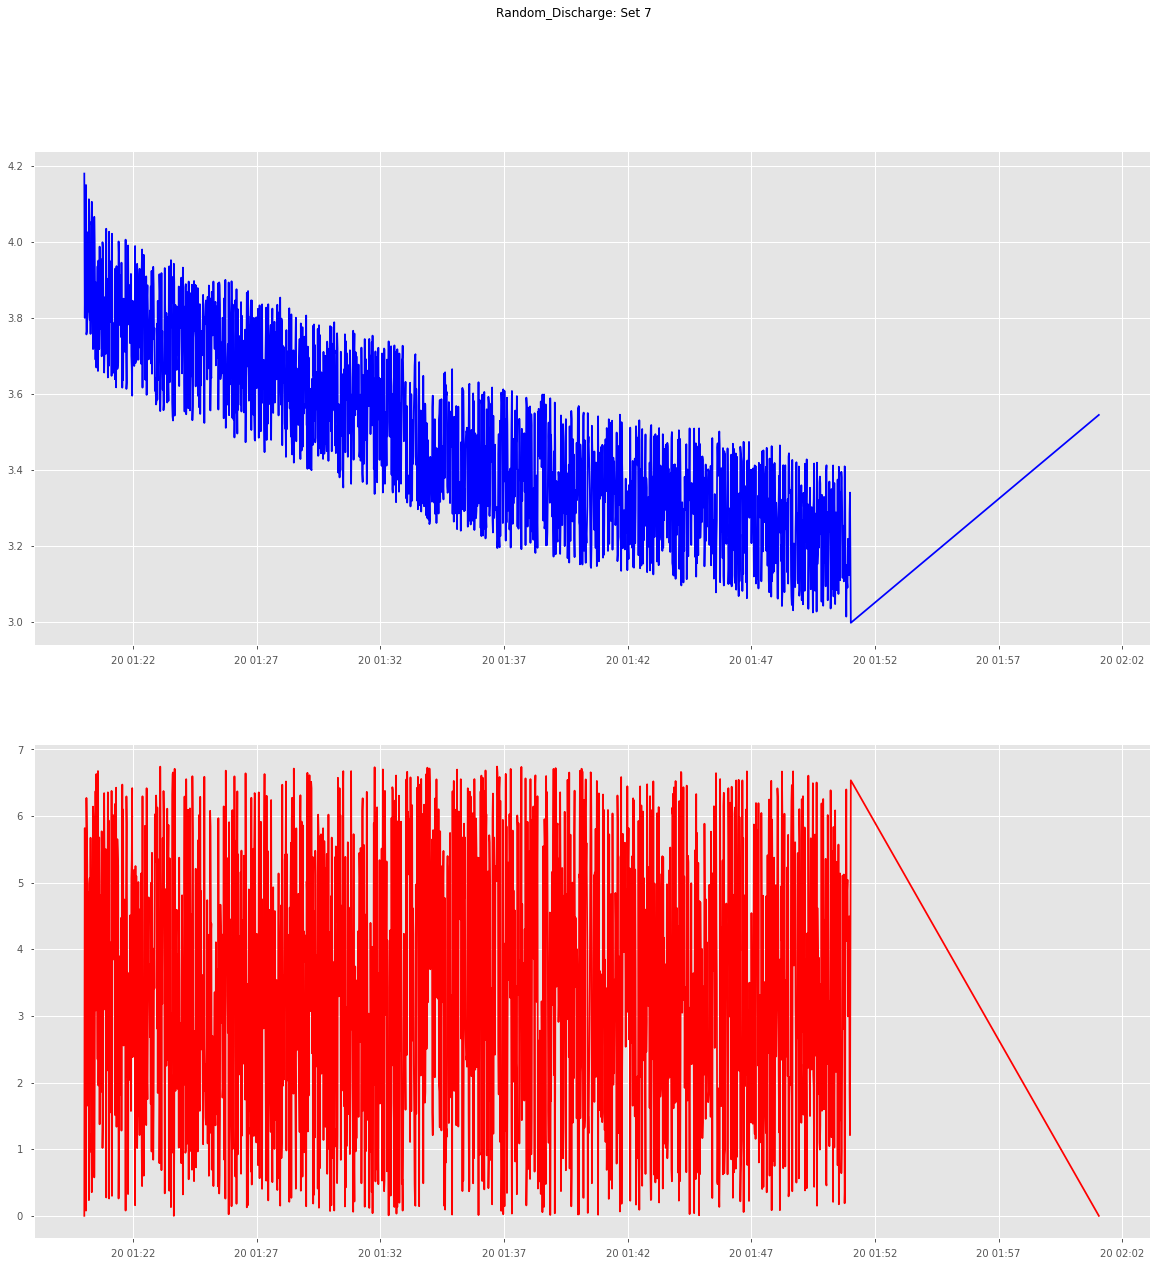

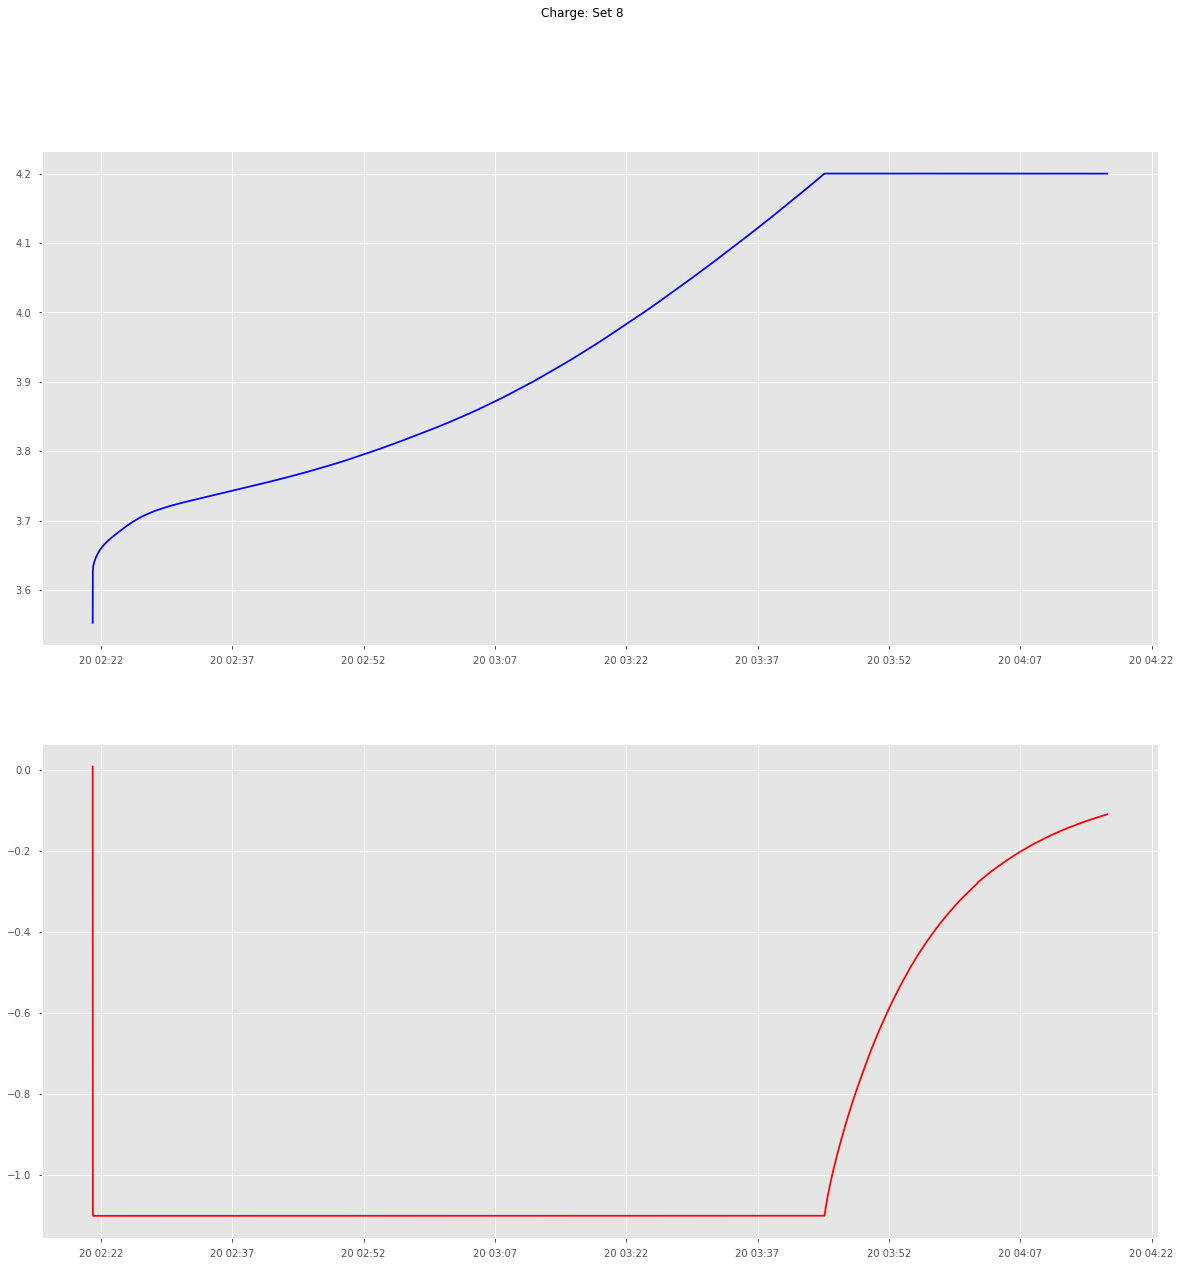

In [5]:
for key in batterySet:
    matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
    plt.figure('Set {}'.format(key))
    plt.suptitle('{}: Set {}'.format(batterySet[key]['type'], key))
    plt.subplot(211)
    plt.plot(batterySet[key]['datetime'].T, batterySet[key]['Voltage'].T, 'b')
    plt.subplot(212)
    plt.plot(batterySet[key]['datetime'].T, -batterySet[key]['Current'].T, 'r')

# Set 1
Set 1-2 are the initial characterisation set for SoC, Set 3-4 are training sets for the observation equation. Set 5-6 are the inference set and 7 is the test set for the new battery.

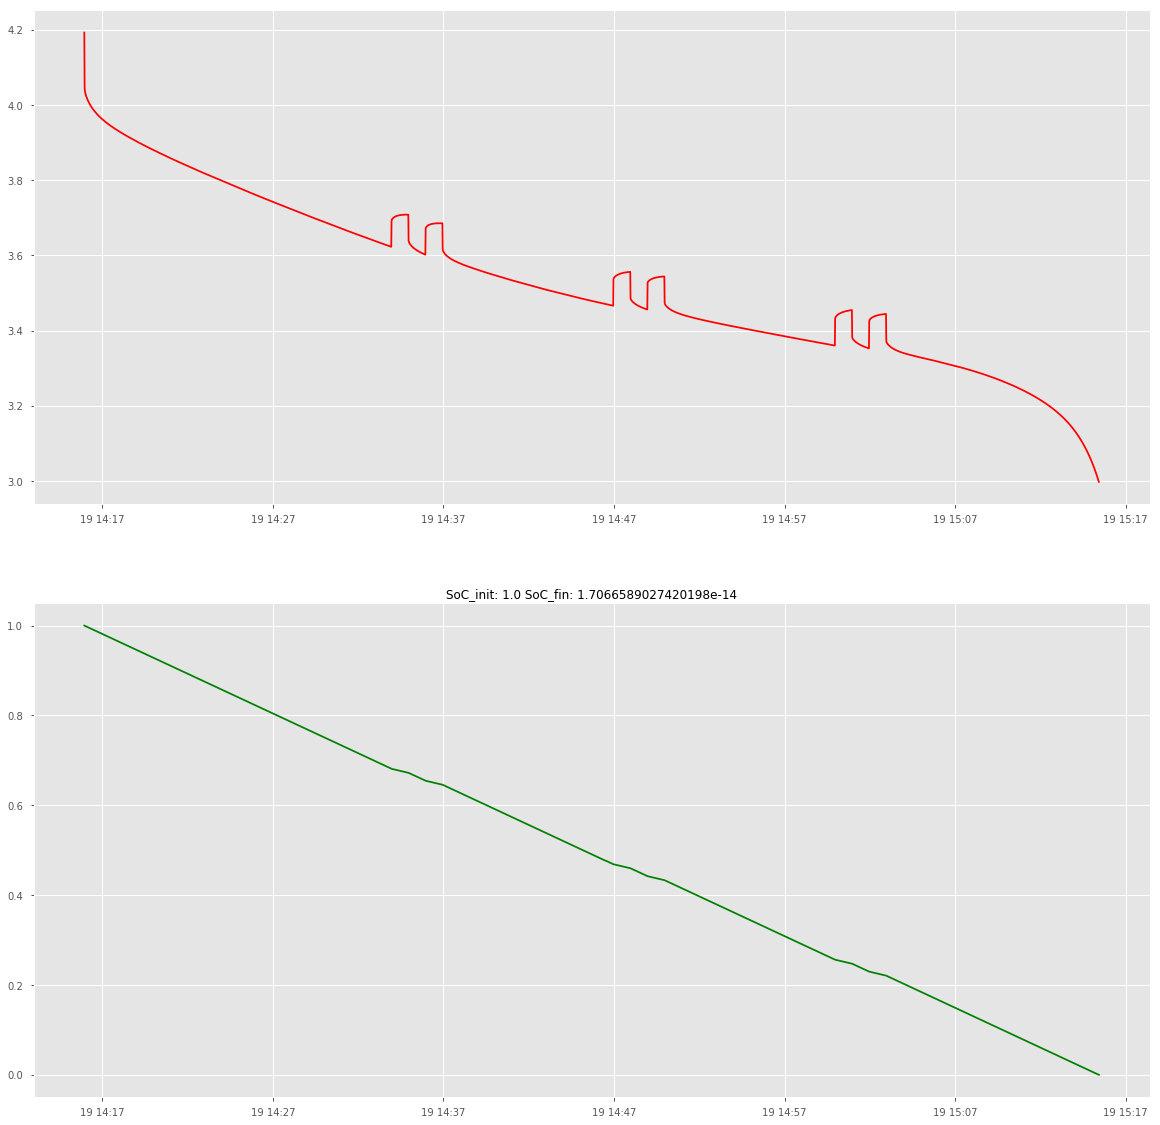

In [6]:
charSet = batterySet[1]
current = np.array(charSet['Current'], ndmin=2)*-1.0
voltage = np.array(charSet['Voltage'], ndmin=2)
seconds = np.ones_like(current)
C_n = np.sum(current*seconds)
E_crit = np.sum(current*seconds*voltage)
SoC = []
SoC_state = 1.0
SoC_init = SoC_state
for i in range(current.shape[1]):
    SoC_state -= current[0, i]/C_n
    SoC.append(SoC_state)

Characterisation_Set = {}
Characterisation_Set['C_n'] = C_n
Characterisation_Set['E_crit'] = E_crit
Characterisation_Set['Sets'] = [{}]
Characterisation_Set['SoC'] = np.array(SoC, ndmin=2)
Characterisation_Set['Current'] = current
Characterisation_Set['Voltage'] = charSet['Voltage']
Characterisation_Set['Sets'][0]['SoC'] = np.array(SoC, ndmin=2)
Characterisation_Set['Sets'][0]['Current'] = current
Characterisation_Set['Sets'][0]['Voltage'] = charSet['Voltage']

matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
plt.figure("SoC Estimate")
plt.subplot(211)
plt.plot(charSet['datetime'].T, charSet['Voltage'].T, 'r')
plt.subplot(212)
plt.title("SoC_init: {0} SoC_fin: {1}".format(SoC_init, SoC[-1]))
plt.plot(charSet['datetime'].T, np.array(SoC), '-g')

In [7]:
print(E_crit)

26267.160775850585


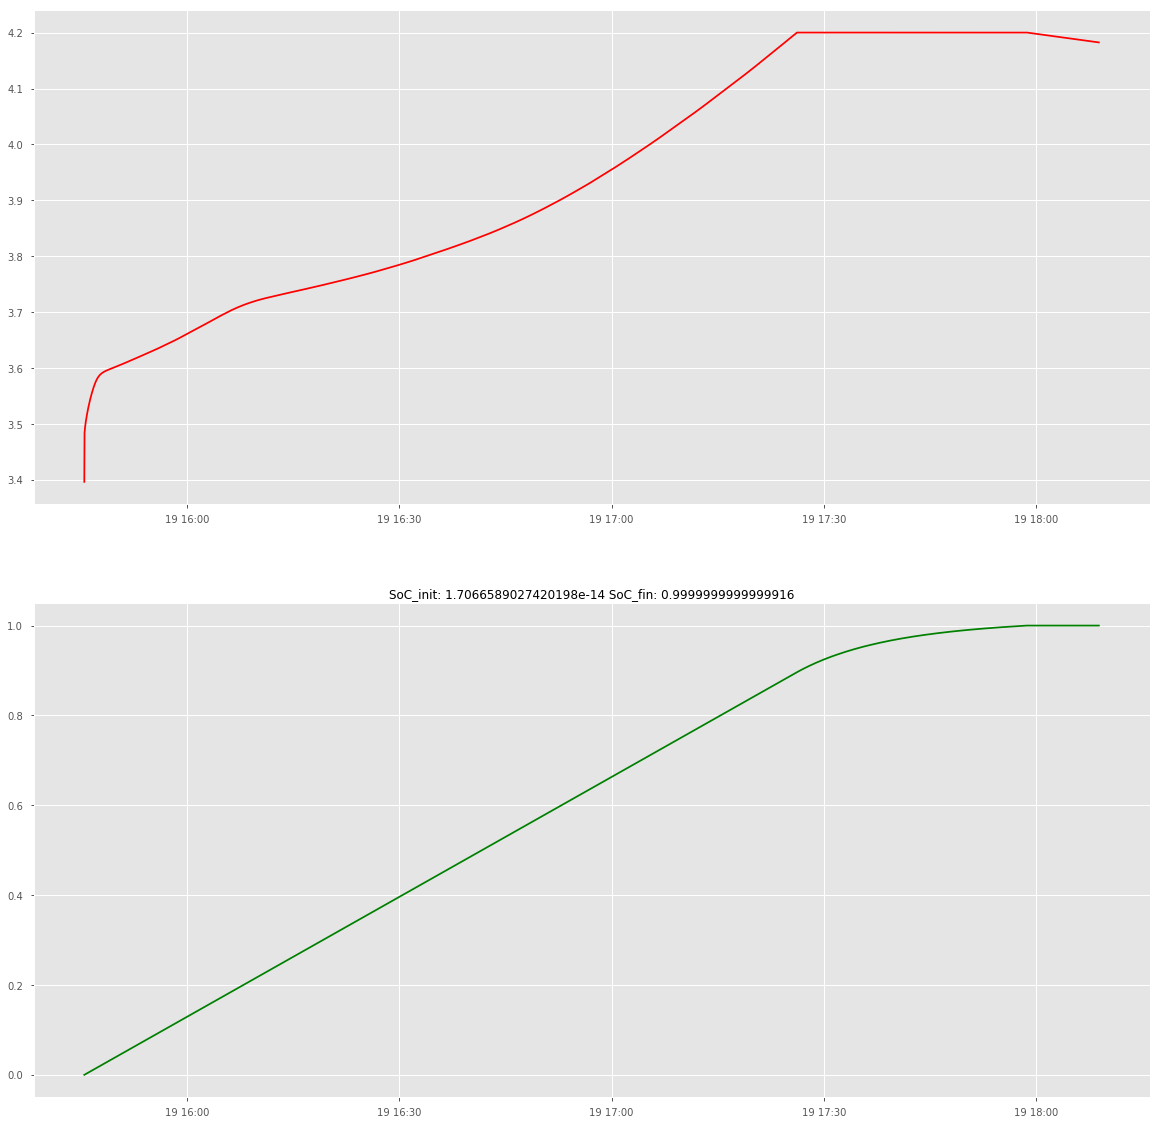

In [8]:
charSet = batterySet[2]
current = np.array(charSet['Current'], ndmin=2)*-1.0
seconds = np.ones_like(current)
C_n_charge = np.sum(current*seconds)*-1.0
efficiency = C_n/C_n_charge
Characterisation_Set["Eta"] = efficiency
SoC = []
SoC_init = SoC_state
for i in range(current.shape[1]):
    SoC_state -= efficiency*current[0, i]/C_n
    SoC.append(SoC_state)
batterySet[2]['SoC'] = np.array(SoC, ndmin=2)
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
plt.figure("SoC Estimate")
plt.subplot(211)
plt.plot(charSet['datetime'].T, charSet['Voltage'].T, 'r')
plt.subplot(212)
plt.title("SoC_init: {0} SoC_fin: {1}".format(SoC_init, SoC[-1]))
plt.plot(charSet['datetime'].T, np.array(SoC), '-g')

(1, 5422) (1, 5422) (1, 5422)


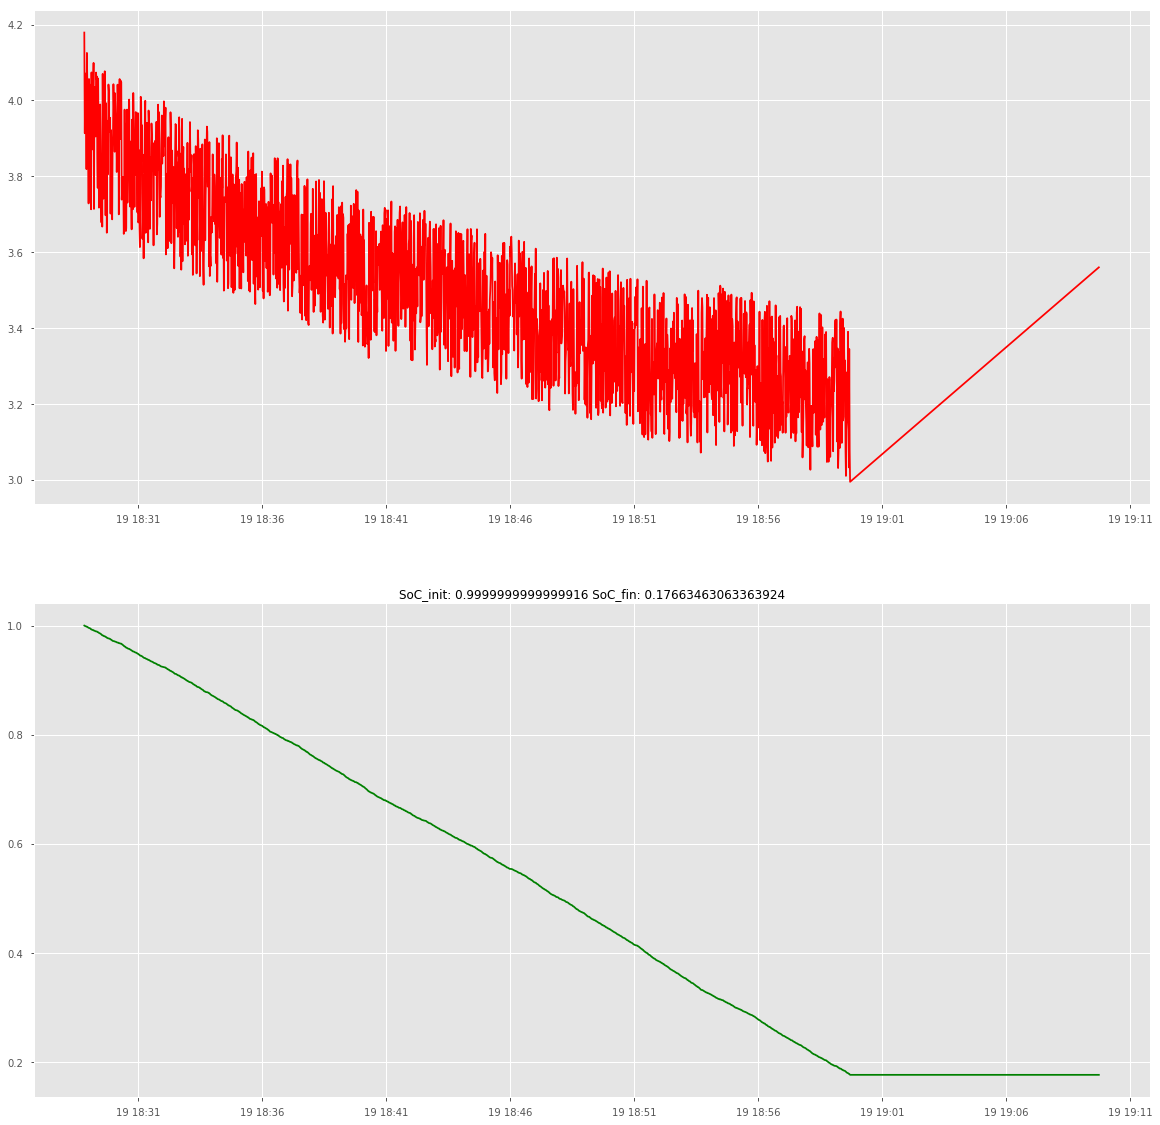

In [9]:
charSet = batterySet[3]
current = np.array(charSet['Current'], ndmin=2)*-1.0
SoC = []
SoC_init = SoC_state
for i in range(current.shape[1]):
    SoC_state -= current[0, i]/C_n
    SoC.append(SoC_state)

Characterisation_Set['SoC'] = np.concatenate((Characterisation_Set['SoC'], np.array(SoC, ndmin=2)), axis=1)
Characterisation_Set['Current'] = np.concatenate((Characterisation_Set['Current'], current), axis=1)
Characterisation_Set['Voltage'] = np.concatenate((Characterisation_Set['Voltage'], charSet['Voltage']), axis=1)
Characterisation_Set['Sets'].append({})
Characterisation_Set['Sets'][1]['SoC'] = np.array(SoC, ndmin=2)
Characterisation_Set['Sets'][1]['Current'] = current
Characterisation_Set['Sets'][1]['Voltage'] = charSet['Voltage']
#Check dims
print(Characterisation_Set["SoC"].shape, Characterisation_Set["Current"].shape, Characterisation_Set["Voltage"].shape)
batterySet[3]['SoC'] = np.array(SoC, ndmin=2)
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
plt.figure("SoC Estimate")
plt.subplot(211)
plt.plot(charSet['datetime'].T, charSet['Voltage'].T, 'r')
plt.subplot(212)
plt.title("SoC_init: {0} SoC_fin: {1}".format(SoC_init, SoC[-1]))
plt.plot(charSet['datetime'].T, np.array(SoC), '-g')

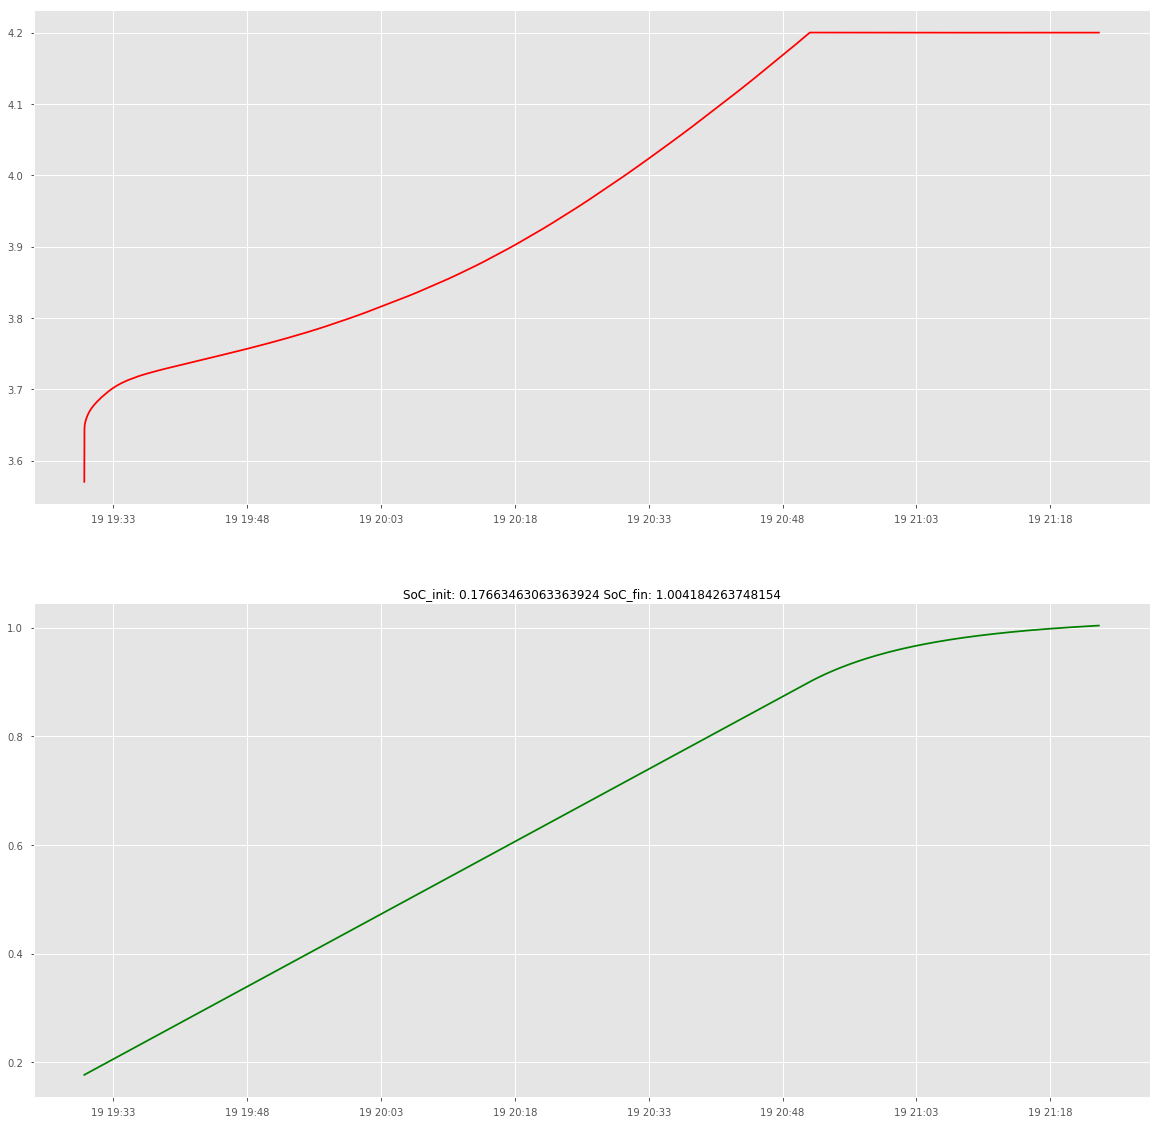

In [10]:
charSet = batterySet[4]
current = np.array(charSet['Current'], ndmin=2)*-1.0
seconds = np.ones_like(current)
SoC_init = SoC_state
SoC = []
for i in range(current.shape[1]):
    SoC_state -= efficiency*current[0, i]/C_n
    SoC.append(SoC_state)

batterySet[4]['SoC'] = np.array(SoC, ndmin=2)
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
plt.figure("SoC Estimate")
plt.subplot(211)
plt.plot(charSet['datetime'].T, charSet['Voltage'].T, 'r')
plt.subplot(212)
plt.title("SoC_init: {0} SoC_fin: {1}".format(SoC_init, SoC[-1]))
plt.plot(charSet['datetime'].T, np.array(SoC), '-g')

(1, 7271) (1, 7271) (1, 7271)


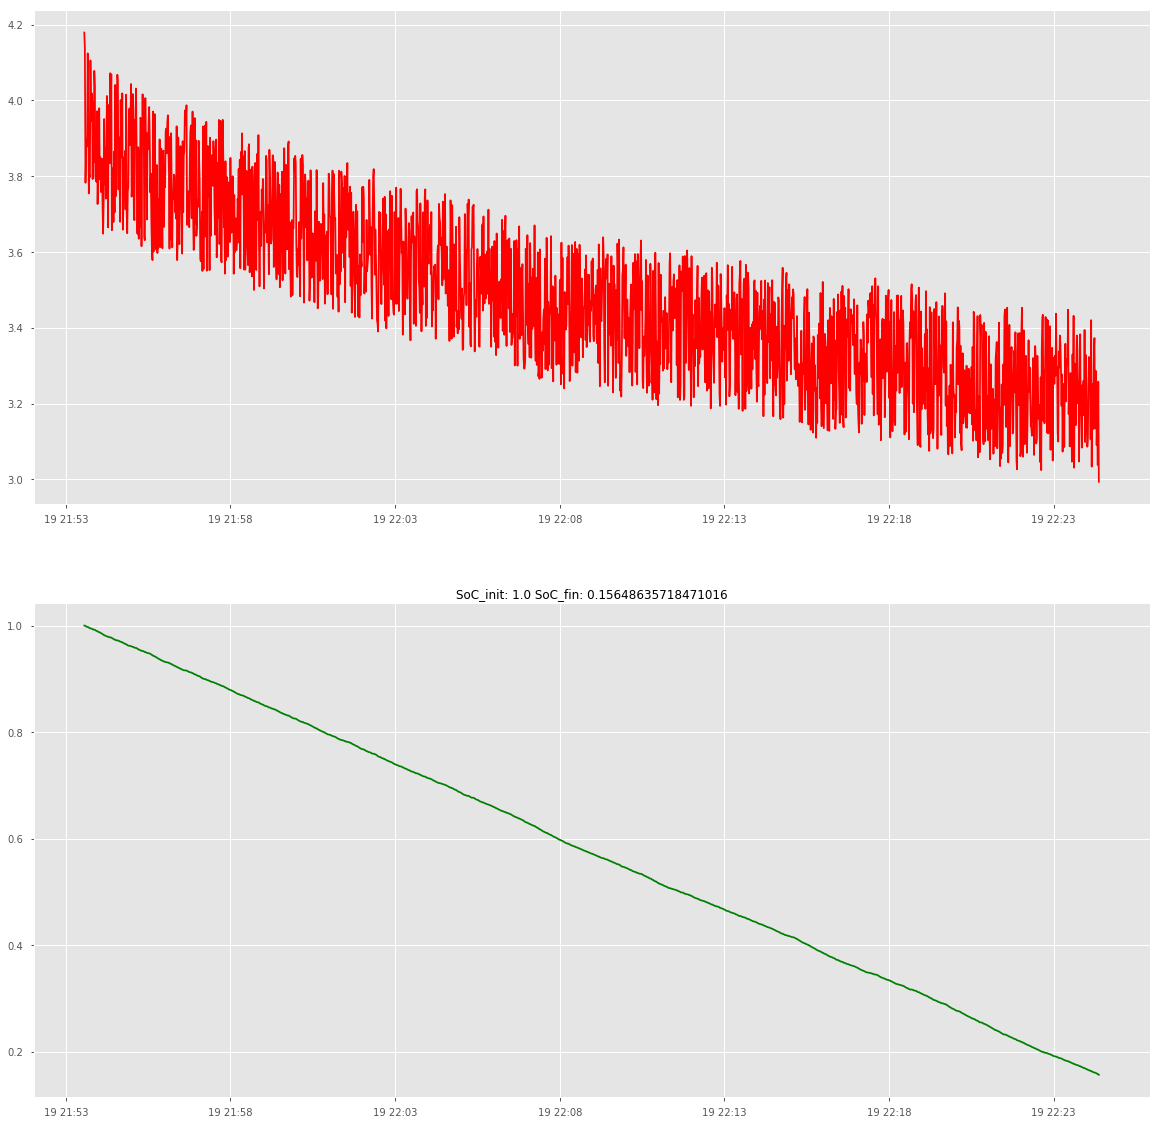

In [11]:
charSet = batterySet[5]
current = np.array(charSet['Current'], ndmin=2)*-1.0
seconds = np.ones_like(current)
SoC_state = 1.0
SoC_init = SoC_state
SoC = []
for i in range(current.shape[1]):
    SoC_state -= efficiency*current[0, i]/C_n
    SoC.append(SoC_state)
    
Characterisation_Set['SoC'] = np.concatenate((Characterisation_Set['SoC'], np.array(SoC, ndmin=2)), axis=1)
Characterisation_Set['Current'] = np.concatenate((Characterisation_Set['Current'], current), axis=1)
Characterisation_Set['Voltage'] = np.concatenate((Characterisation_Set['Voltage'], charSet['Voltage']), axis=1)
Characterisation_Set['Sets'].append({})
Characterisation_Set['Sets'][2]['SoC'] = np.array(SoC, ndmin=2)
Characterisation_Set['Sets'][2]['Current'] = current
Characterisation_Set['Sets'][2]['Voltage'] = charSet['Voltage']
#Check dims
print(Characterisation_Set["SoC"].shape, Characterisation_Set["Current"].shape, Characterisation_Set["Voltage"].shape)

batterySet[5]['SoC'] = np.array(SoC, ndmin=2)
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
plt.figure("SoC Estimate")
plt.subplot(211)
plt.plot(charSet['datetime'].T, charSet['Voltage'].T, 'r')
plt.subplot(212)
plt.title("SoC_init: {0} SoC_fin: {1}".format(SoC_init, SoC[-1]))
plt.plot(charSet['datetime'].T, np.array(SoC), '-g')

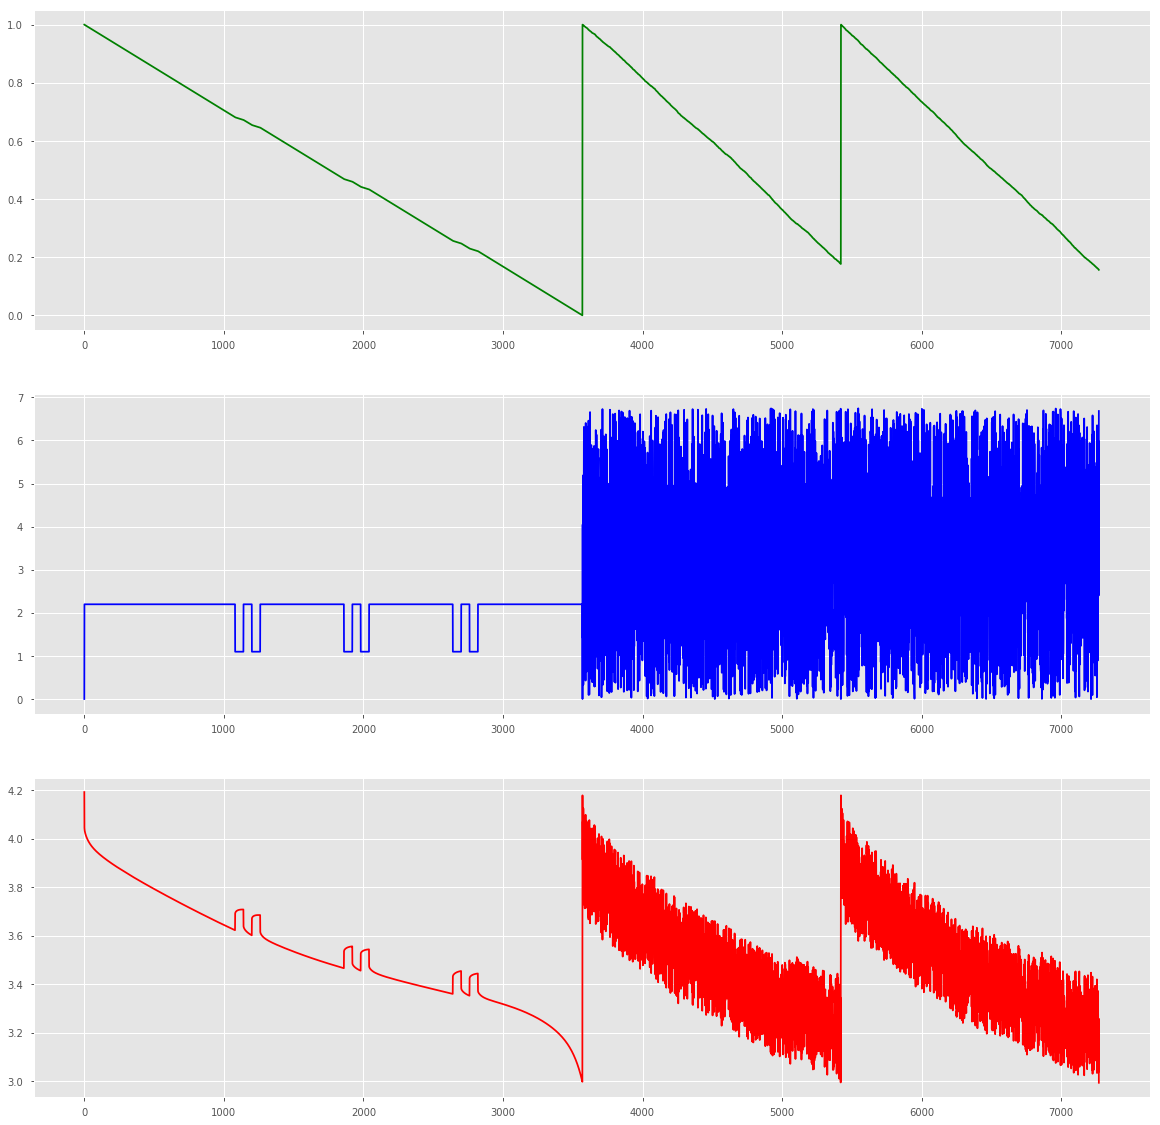

In [12]:
plt.figure("Characterisation_Set")
plt.subplot(311)
plt.plot(Characterisation_Set["SoC"].T, '-g')
plt.subplot(312)
plt.plot(Characterisation_Set["Current"].T, '-b')
plt.subplot(313)
plt.plot(Characterisation_Set["Voltage"].T, '-r')

In [13]:
pickle.dump(Characterisation_Set, open("Battery_Data/new_battery_cycles/Characterisation_Set_Complete.p", 'wb'))